In [1]:
# lib
import numpy as np 
from numpy import ndarray
from IPython import display

## Linear Regression

In [7]:
def forward_linear_regression(X_batch:ndarray, 
                              y_batch:ndarray, 
                              weights ): # -> Tuple[float, Dict[str,ndarray]]:
    '''
        Forward pass for the step-by-step linear regression.
    '''
    
    # assert batch sizes of X and y are equal 
    assert(X_batch.shape[0] == y.shape.shape[0])
    
    # assert that matrix multiplication can work 
    assert(X_batch.shape[1] == weights['W'].shape[0])
    
    # assert that B is simply a 1x1 ndarray
    assert(weights['B'].shape[0] == weights['B'].shape[1] == 1)
    
    # compute the operations on the forward pass 
    N = np.dot(X_batch, weights['W'])
    
    P = N + weights['B']
    
    loss = np.mean(np.power(y_batch - P, 2))
    
    # save the information computed on the forward pass 
    forward_info = {}
        
    forward_info['X'] = X_batch
    forward_info['N'] = N
    forward_info['P'] = P
    forward_info['y'] = y_batch
    
    return forward_info, loss

## Training the Model

* We are now going to use all the tools we learned in the last chapter to compute ∂L/∂w_i for every w_i in W, as well as ∂L/∂b .

### Calculating the Gradients: A Diagram

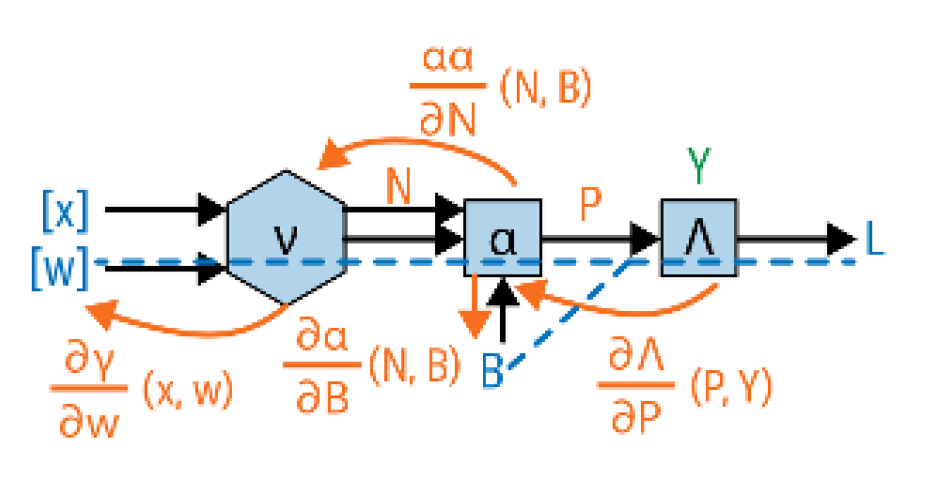

In [3]:
display.Image("./pic1.png")

In [8]:
def loss_gradients(forward_info, weights):
    '''
        Compute dLdW and dLdB for the step-by-step linear regression model.
    '''
    batch_size = forward_info['X'].shape[0]
    
    dLdP = -2 * (forward_info['y'] - forward_infp['P'])
    
    dPdN = np.ones_like(forward_info['N'])
    
    dPdB = np.ones_like(forward_info['B'])
    
    dLdN = dLdP * dPdN # it is chain rule.
    
    dNdW = np.transpose(forward_info['x'], (1,0))
    
    # need to use matrix multiplication here.
    # with dNdW on the left
    
    dLdW = np.dot(dNdW, dLdN)
    
    # need to sum along dimension representing the batch size 
    dLdB = (dLdP * dPdB).sum(axis=0) 
    
    loss_gradients['W'] = dLdW
    loss_gradients['B'] = dLdB
    
    return loss_gradients

* An implementation detail about those loss gradients: we’re storing
them as a dictionary, with the names of the weights as keys and the
amounts that increasing the weights affect the losses as values. The
weights dictionary is structured the same way. Therefore, we’ll
iterate through the weights in our model in the following way:

       * for key in weights.keys():
            weights[key] -= learning_rate * loss_grads[key]

## Using These Gradients to Train the Model


Now we’ll simply run the following procedure over and over again:
1. Select a batch of data.
2. Run the forward pass of the model.
3. Run the backward pass of the model using the info computed on the forward
pass.
4. Use the gradients computed on the backward pass to update the weights.

In [9]:
forward_info, loss = forward_linear_regression(forward_info['X'], forward_info['y'], weights)

loss_grads = loss_gradients(forward_info, loss)

for key in weights.keys():   # 'weights' and 'loss grads' have the same keys
    weights[key] -= learning_rate * loss_grads[key]
    

NameError: name 'X_batch' is not defined

In [ ]:
train_info = train( X_train, y_train,
                    learning_rate = 0.001,
                    batch_size=23,
                    return_weights=True,
                    seed=80718)

* The train function returns train_info, a Tuple, one element of which is the parameters
or weights that represent what the model has learned.

* The terms “parameters” and “weights” are used interchangeably.
throughout deep learning, so we will use them interchangeably.

## Assessing Our Model: The Code

In [11]:
def predict(X, weights):
    '''
        Generate predictions from the step by step linear regression model.
    '''
    
    N = np.dot(X, weights['W'])
    
    return N + weights['B']

In [12]:
# Then we simply use the weights returned earlier from the train function and write

preds = predict(X_test, weights)  # weights=train_info[0]

NameError: name 'X_test' is not defined

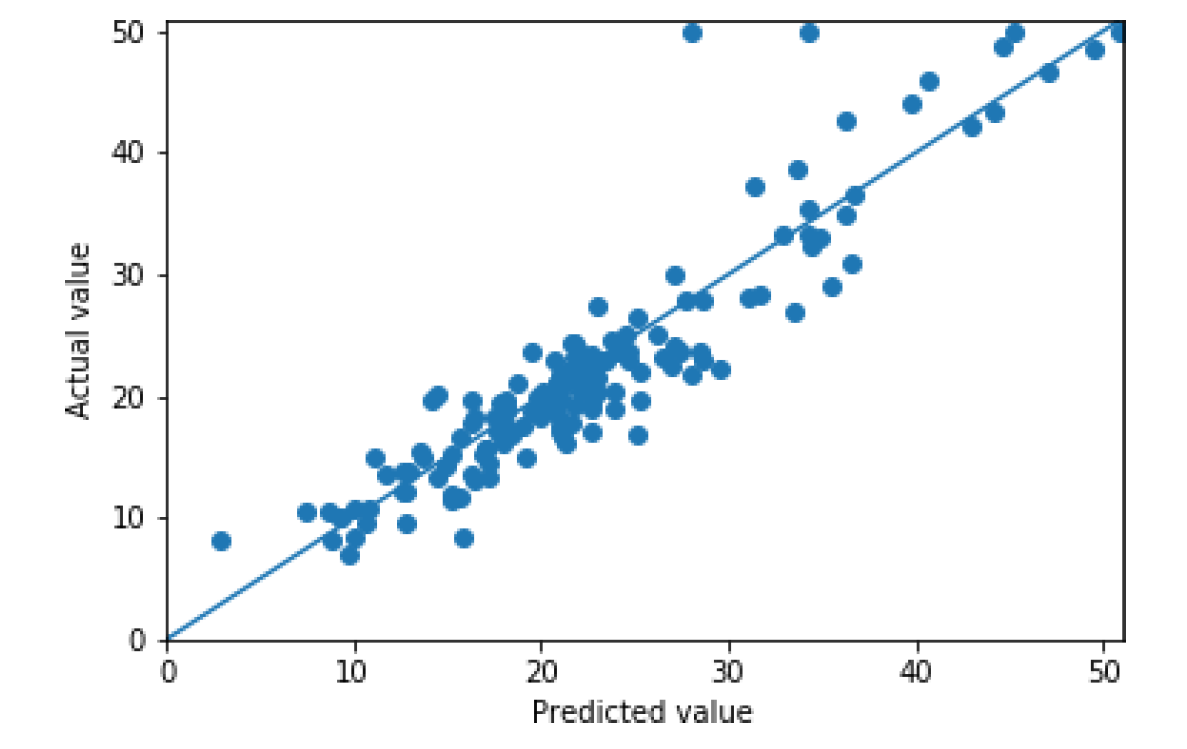

In [13]:
display.Image("./pic2.png")

Our plot looks pretty good, but let’s quantify how good the model is. There are a couple
of common ways to do that:

        • Calculate the mean distance, in absolute value, between our model’s predictions and the actual values, a metric called mean absolute error:

In [14]:
def mae(preds, actuals):
    '''
        calculate mean absolute error.
    '''
    
    return np.mean(np.abs(preds - actuals))

• Calculate the mean squared distance between our model’s predictions and the
actual values, a metric known as root mean squared error:

In [16]:
def rmse(preds, actuals):
    '''
        compute root mean squared error.
    '''
    
    return np.sqrt(np.mean(np.power(preds-actauls, 2)))

The values for this particular model are:
    
    * Mean absolute error: 3.5643
    * Root mean squared error: 5.050

## Analyzing the Most Important Feature

Before beginning modeling, we scaled each feature of our data to have mean 0 and
standard deviation 1; this has computational advantages that we’ll discuss in more
detail in Chapter 4. A benefit of doing this that is specific to linear regression is that
we can interpret the absolute values of the coefficients as corresponding to the
importance of the different features to the model; a larger coefficient means that the
feature is more important. Here are the coefficients:

In [17]:
np.round(weights['W'].reshape(-1), 4)
'''
array([-1.0084, 0.7097, 0.2731, 0.7161, -2.2163, 2.3737, 0.7156,
        -2.6609, 2.629 , -1.8113, -2.3347, 0.8541, -4.2003])
'''

NameError: name 'weights' is not defined

* The fact that the last coefficient is largest means that the last feature in the dataset is
the most important one.

# Neural Networks from Scratch

* We’ve just seen how to build and train a linear regression model from first principles.
How can we extend this chain of reasoning to design a more complex model that can
learn nonlinear relationships? The central idea is that we’ll first do many linear
regressions, then feed the results through a nonlinear function, and finally do one last
linear regression that ultimately makes the predictions. As it will turn out, we can
reason through how to compute the gradients for this more complicated model in the
same way we did for the linear regression model.

## Step 1: A Bunch of Linear Regressions

* What does it mean to do “a bunch of linear regressions”? Well, doing one linear regression involved doing a matrix multiplication with a set of parameters: if our data X had dimensions [batch_size, num_features], then we multiplied it by a weight matrix W with dimensions [num_features, 1] to get an output of dimension [batch_size, 1]; this output is, for each observation in the batch, simply a weighted sum of the original features. 
       * To do multiple linear regressions, we’ll simply multiply our input by a weight matrix with dimensions [num_features, num_outputs], resulting in an output of dimensions [batch_size, num_outputs]; now, for each observation, we have num_outputs different weighted sums of the original features

## Step 2: A Nonlinear Function

* we’ll feed each of these weighted sums through a nonlinear function; the first function we’ll try is the sigmoid function

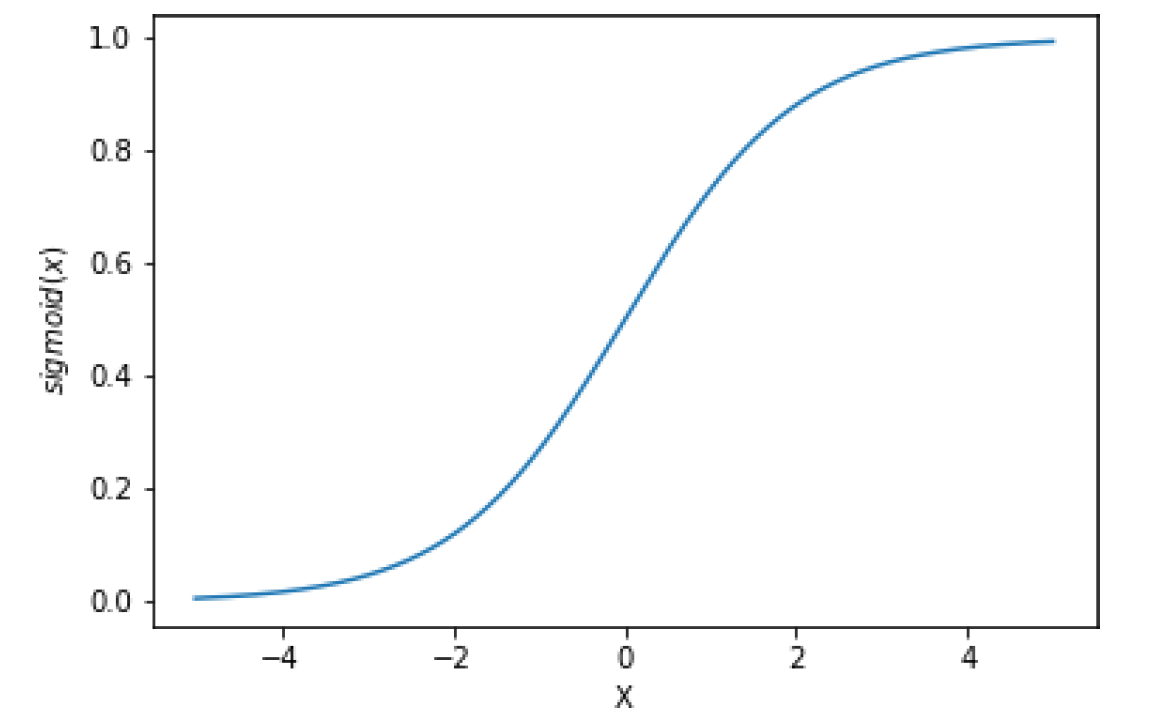

In [19]:
display.Image("./pic3.png")

### Why is using this nonlinear function a good idea? Why not the square function f(x) = x(square(2)), for example? There are a couple of reasons: 

* First, we want the function we use here to be monotonic so that it “preserves” information about the numbers that were fed in.
        * Let’s say that, given the date that was fed in, two of our linear regressions produced values of –3 and 3, respectively. Feeding these through the square function would then produce a value of 9 for each, so that any function that receives these numbers as inputs after they were fed through the square function would “lose” the information that one of them was originally –3 and the other was 3.
        
* The second reason, of course, is that the function is nonlinear; this nonlinearity will enable our neural network to model the inherently nonlinear relationship between the features and the target.

* Finally, the sigmoid function has the nice property that its derivative can be expressed in terms of the function itself:
    
    ∂σ(x)/∂u = σ(x) × (1 − σ (x))
    
    
    * We’ll make use of this shortly when we use the sigmoid function in the backward pass of our neural network.

## Step 3: Another Linear Regression



In [23]:
def forward_loss(X, y, weights):
    '''
        compute the forward pass and the loss for the step-by-step neural network model.
    '''
    
    M1 = np.dot(X, weights['W1'])
    
    N1 = M1 + weights['B1']
    
    O1 = sigmoid(N1)
    
    M2 = np.dot(O1, weights['W2'])
    
    P = M2 + weights['B2']
    
    loss = np.mean(np.power(y-P, 2))
    
    forward_info = {}
    forward_info['X'] = X
    forward_info['M1'] = M1
    forward_info['N1'] = N1
    forward_info['O1'] = O1
    forward_info['M2'] = M2
    forward_info['P'] = P
    forward_info['y'] = y
    
    return forward_info, loss 
    

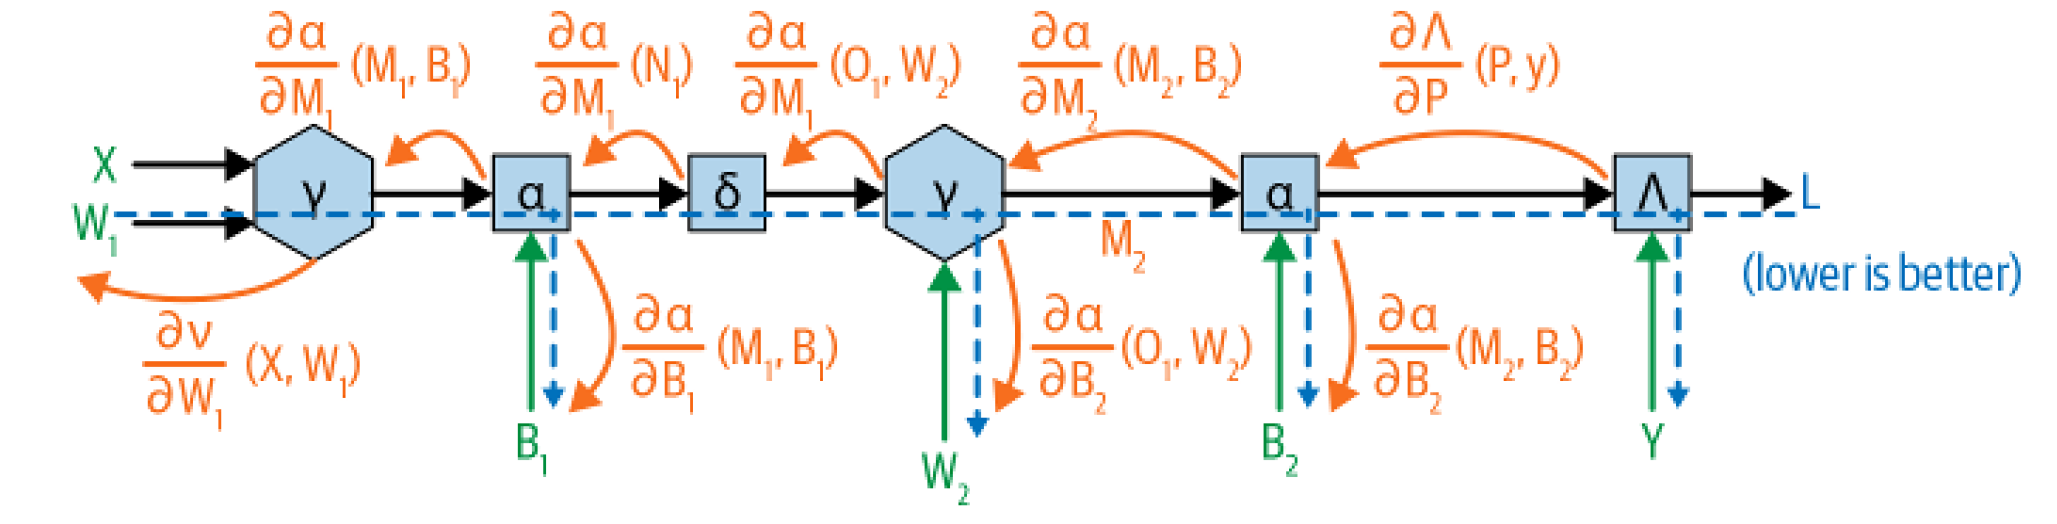

In [24]:
display.Image("./pic4.png")

### Math (and code)

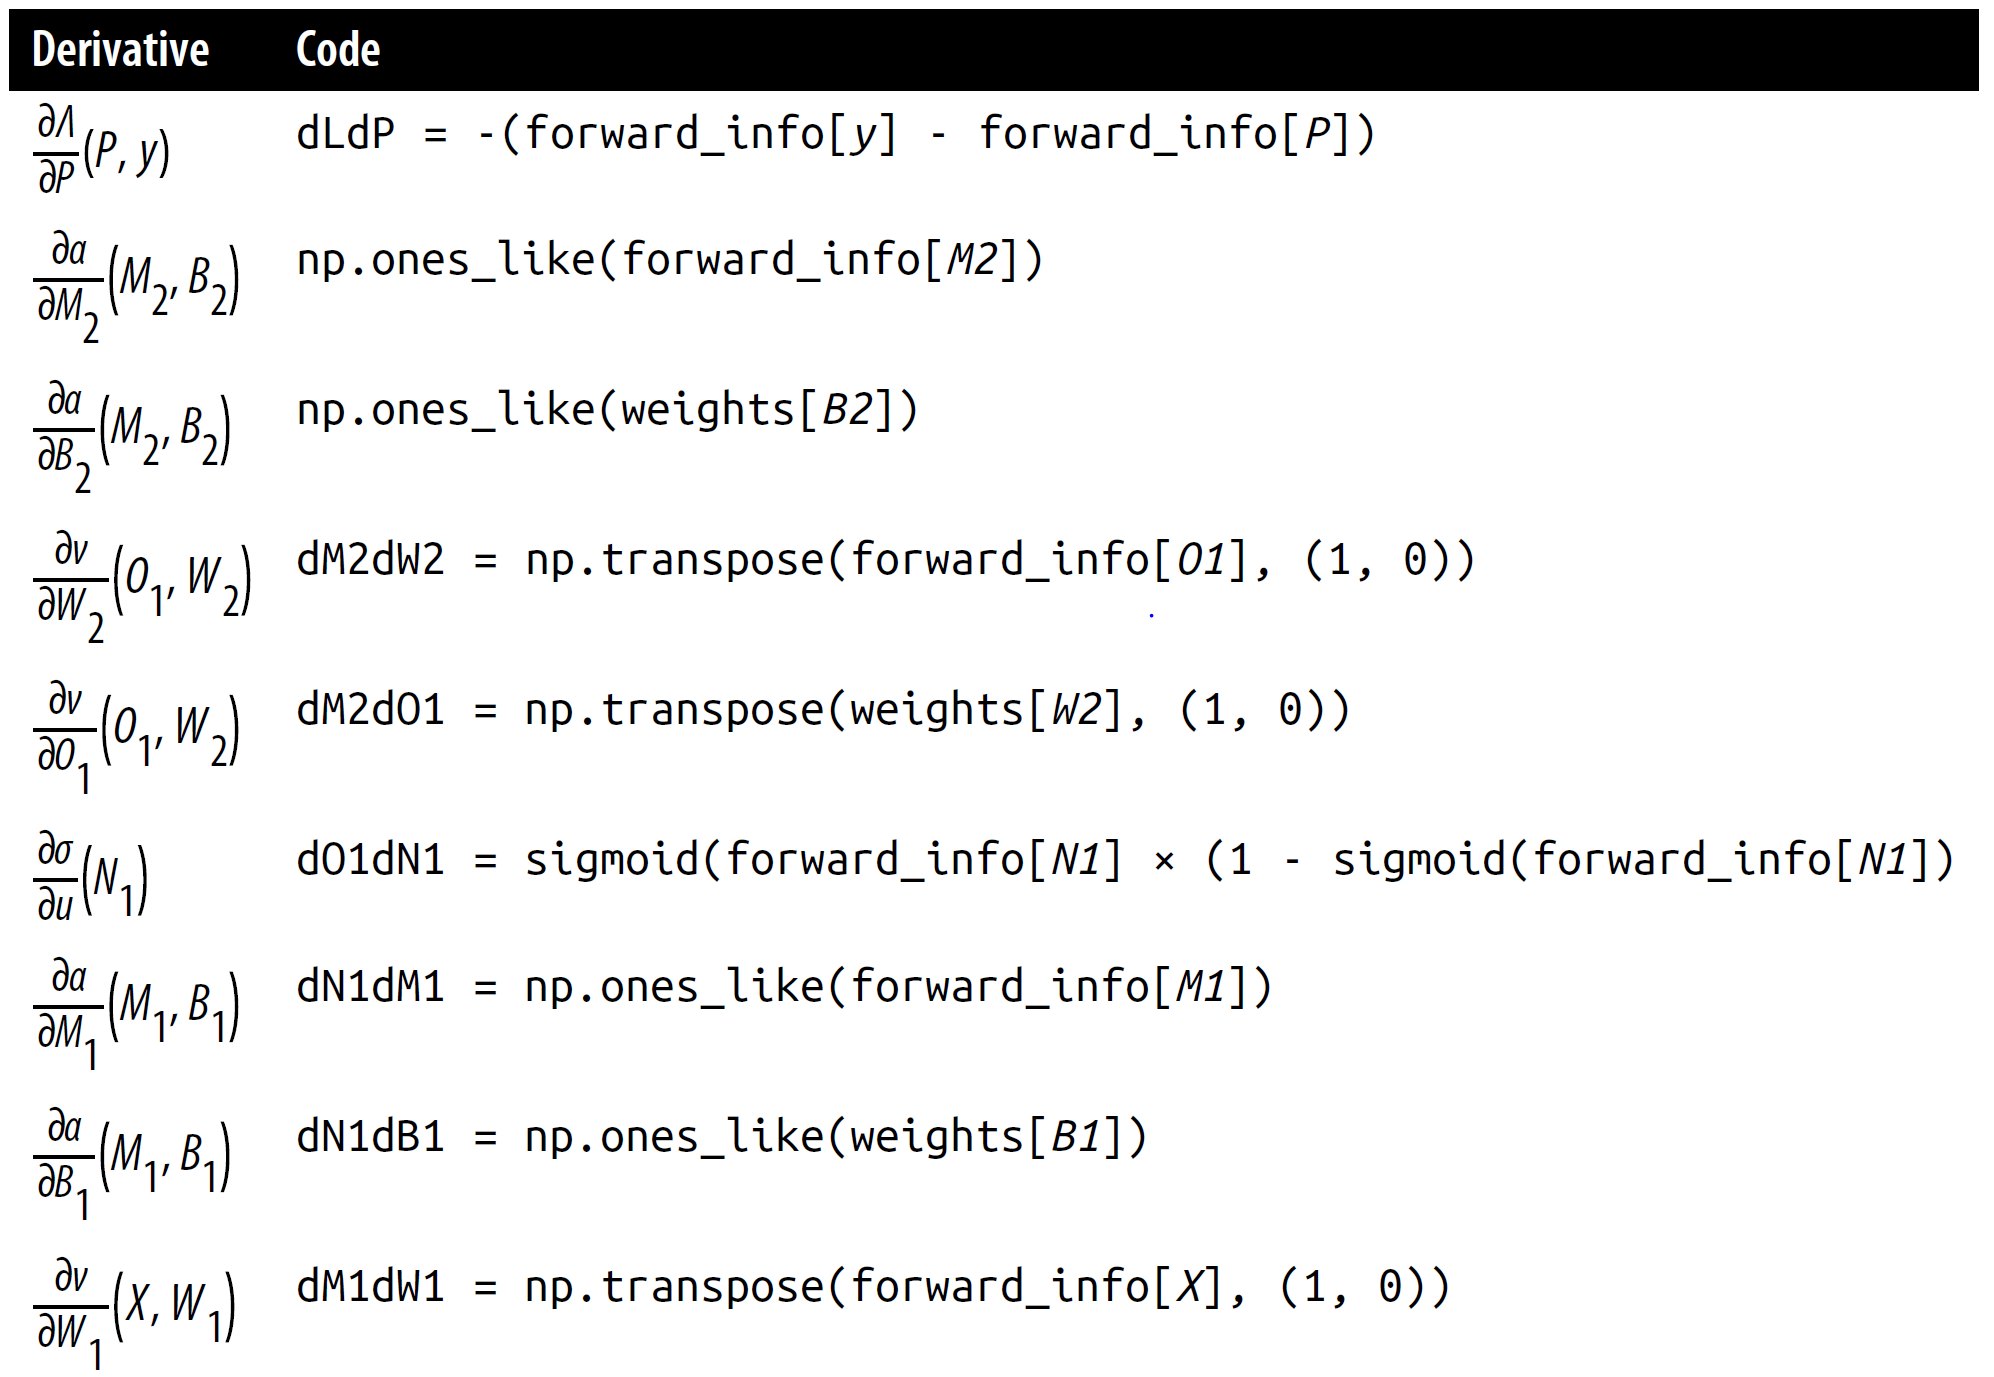

In [25]:
display.Image("./pic5.png")

In [29]:

def loss_gradients(forward_info, 
                   weights):
    '''
    Compute the partial derivatives of the loss with respect to each of the parameters in the neural network.
    '''    
    dLdP = -(forward_info['y'] - forward_info['P'])
    
    dPdM2 = np.ones_like(forward_info['M2'])

    dLdM2 = dLdP * dPdM2
  
    dPdB2 = np.ones_like(weights['B2'])

    dLdB2 = (dLdP * dPdB2).sum(axis=0)
    
    dM2dW2 = np.transpose(forward_info['O1'], (1, 0))
    
    dLdW2 = np.dot(dM2dW2, dLdP)

    dM2dO1 = np.transpose(weights['W2'], (1, 0)) 

    dLdO1 = np.dot(dLdM2, dM2dO1)
    
    dO1dN1 = sigmoid(forward_info['N1']) * (1- sigmoid(forward_info['N1']))
    
    dLdN1 = dLdO1 * dO1dN1
    
    dN1dB1 = np.ones_like(weights['B1'])
    
    dN1dM1 = np.ones_like(forward_info['M1'])
    
    dLdB1 = (dLdN1 * dN1dB1).sum(axis=0)
    
    dLdM1 = dLdN1 * dN1dM1
    
    dM1dW1 = np.transpose(forward_info['X'], (1, 0)) 

    dLdW1 = np.dot(dM1dW1, dLdM1)

    loss_gradients: Dict[str, ndarray] = {}
    loss_gradients['W2'] = dLdW2
    loss_gradients['B2'] = dLdB2.sum(axis=0)
    loss_gradients['W1'] = dLdW1
    loss_gradients['B1'] = dLdB1.sum(axis=0)
    
    return loss_gradients

In [27]:
def predict(X: ndarray,
    weights):
    '''
    Generate predictions from the step-by-step neural network model.
    '''
    M1 = np.dot(X, weights['W1'])
    N1 = M1 + weights['B1']
    O1 = sigmoid(N1)
    M2 = np.dot(O1, weights['W2'])
    P = M2 + weights['B2']
    return P